In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [16]:
df = pd.read_csv("C:/Users/Acer/Desktop/Kaggle/Wine testing/winequality-red.csv")

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

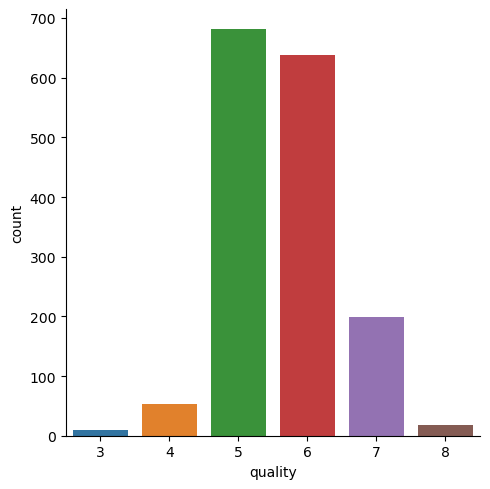

In [20]:
sns.catplot(x = 'quality', data = df, kind = 'count')

In [21]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [22]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.1)

## Logistic Regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_tr_pr_lr = lr.predict(X_train)
accuracy_score(y_tr_pr_lr, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5858234885337039

In [25]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_tr_pr_lr = lr.predict(X_train)
accuracy_score(y_tr_pr_lr, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6031966643502432

In [26]:
y_test_pr_lr = lr.predict(X_test)
accuracy_score(y_test_pr_lr, y_test)              ## 58.75% test accuracy

0.6

#### Logistic Regression is giving a terrible result here.

## Random Forest

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
y_train_pred_rf = rf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_rf))
print(accuracy_score(y_test_pred_rf, y_test))

1.0
0.68125


## not a result as great as I expected

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 88)
rf.fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
y_train_pred_rf = rf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_rf))
print(accuracy_score(y_test_pred_rf, y_test))

1.0
0.690625


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 8)
rf.fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
y_train_pred_rf = rf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_rf))
print(accuracy_score(y_test_pred_rf, y_test))

1.0
0.69375


### I must turn to my nemesis - GridSearchCV 
##### I don't like it because it is very slow.

In [35]:
from sklearn.model_selection import GridSearchCV
params = {
                'n_estimators': [50,100,200],  'max_depth': ['None', 10, 20], 
                 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4],
}

In [36]:
grd = GridSearchCV(rf, params, cv = 5)

In [37]:
grd.fit(X_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Acer\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': ['None', 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [38]:
best_rf = grd.best_estimator_

In [39]:
best_params = grd.best_params_

In [40]:
y_test_pred_best = best_rf.predict(X_test)

In [41]:
accuracy_score(y_test_pred_best, y_test)

0.6875

# Well. 